In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
df_train.drop(columns = 'Id',inplace = True)
df_test.drop(columns = 'Id',inplace = True)

In [6]:
df_train.columns = [col.lower().replace(' ','_') for col in df_train.columns]
df_test.columns = [col.lower().replace(' ','_') for col in df_test.columns]

In [7]:
df_train.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
garage_cars          1
garage_area          1
bsmtfin_sf_1         1
dtype: int64

In [8]:
df_test.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
bsmt_cond          25
bsmt_qual          25
mas_vnr_area        1
mas_vnr_type        1
electrical          1
dtype: int64

##  PID

In [9]:
#  Property IDs in Story County are made of groups...

#  https://www.storycountyiowa.gov/DocumentCenter/View/6074/A-Guide-to-Geo-Numbering-in-Story-County?bidId=

for df in [df_train,df_test]:
    df['pid_1'] = df['pid'].astype('str').str[:1]
    df['pid_2'] = df['pid'].astype('str').str[1:3]
    df['pid_3'] = df['pid'].astype('str').str[3:6]
    df['pid_4'] = df['pid'].astype('str').str[6:9]

##  MS Subclass

In [10]:
df_train.groupby(['ms_subclass'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
ms_subclass,,,,,,,,
20,770.0,189305.488312,83531.300792,13100.0,134112.5,160000.0,223750.0,611657.0
30,101.0,94936.346535,29223.589715,12789.0,76500.0,99500.0,112000.0,168000.0
40,4.0,119125.000000,31967.105489,79500.0,101250.0,122500.0,140375.0,152000.0
45,11.0,116372.727273,15503.618346,87000.0,111000.0,113000.0,125500.0,139400.0
50,198.0,137270.000000,46383.634825,37900.0,114625.0,129675.0,149975.0,410000.0
60,394.0,239225.769036,77910.941364,129000.0,185000.0,215100.0,275375.0,584500.0
70,90.0,153354.455556,44642.191773,40000.0,125875.0,147500.0,173125.0,266500.0
75,16.0,204875.000000,114016.446182,101000.0,129125.0,163500.0,234625.0,475000.0
80,86.0,169569.825581,35942.161024,100000.0,148000.0,165000.0,179425.0,345000.0


## MS Zoning

In [11]:
df_train['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [12]:
df_train.groupby(['ms_zoning'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
ms_zoning,,,,,,,,
A (agr),2.0,47300.000000,48366.103833,13100.0,30200.0,47300.0,64400.0,81500.0
C (all),19.0,78010.894737,32781.478897,34900.0,50913.5,75000.0,105388.0,140000.0
FV,101.0,218618.316832,53063.423791,144152.0,176500.0,208900.0,254900.0,370878.0
I (all),1.0,57625.000000,NaN,57625.0,57625.0,57625.0,57625.0,57625.0
RH,14.0,148859.571429,35970.877401,82000.0,128500.0,152217.0,180000.0,200000.0
RL,1598.0,191235.164581,80380.790716,35000.0,137500.0,172500.0,222375.0,611657.0
RM,316.0,129119.142405,50776.911622,12789.0,103300.0,123900.0,141500.0,475000.0


In [13]:
for df in [df_train,df_test]:
    df['ms_zoning'] = [0 if val == 'A (agr)' 
                         else 1 if val == 'I (all)' 
                         else 2 if val == 'C (all)'
                         else 3 if val == 'RH'
                         else 4 if val == 'RM'
                         else 5 if val == 'RL'
                         else 6
                         for val in df['ms_zoning']]

## Lot Frontage

In [14]:
df_train.loc[df_train['lot_frontage'].isnull() == True,'lot_config'].value_counts()

Inside     190
Corner      67
CulDSac     61
FR2         11
FR3          1
Name: lot_config, dtype: int64

<AxesSubplot:xlabel='lot_area', ylabel='lot_frontage'>

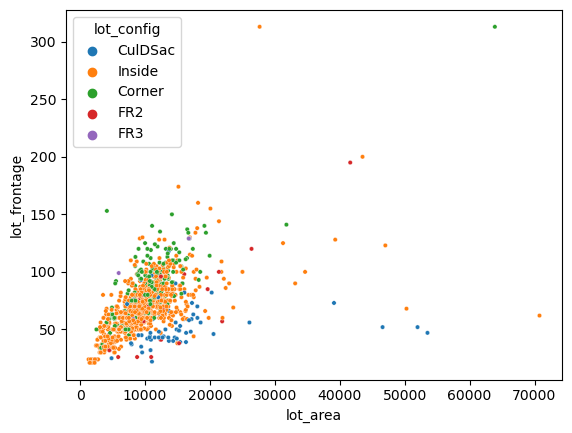

In [15]:
sns.scatterplot(data = df_train, 
                y = 'lot_frontage',
                x = 'lot_area',
                hue=df_train['lot_config'], s=10)

In [16]:
df_train['lot_frontage'].fillna(df_train['lot_frontage'].mean())

0       69.0552
1       43.0000
2       68.0000
3       73.0000
4       82.0000
         ...   
2046    79.0000
2047    69.0552
2048    57.0000
2049    80.0000
2050    60.0000
Name: lot_frontage, Length: 2051, dtype: float64

In [17]:
df_train['fr_rate'] = df_train['lot_frontage']/df_train['lot_area']

In [18]:
df_train['fr_rate'] = df_train.loc[df_train['fr_rate'] != 0, 'fr_rate']

In [19]:
df_train['fr_rate'].describe()

count    1721.000000
mean        0.007918
std         0.002431
min         0.000876
25%         0.006626
50%         0.007727
75%         0.008701
max         0.037154
Name: fr_rate, dtype: float64

In [20]:
np.random.normal(loc = 0.007727, scale =  0.002431)

0.008601160022430304

In [21]:
df_train.loc[df_train['lot_frontage'] == 0,'lot_frontage'] = df_train.loc[df_train['lot_frontage'] == 0,'lot_area'] * np.random.normal(loc = 0.007727, scale =  0.002431)

In [22]:
for idx in range(len(df_train)):
    if df_train.loc[idx,'lot_frontage'] == np.nan:
        df_train.loc[idx,'lot_frontage'].fillna(

SyntaxError: unexpected EOF while parsing (489048598.py, line 3)

In [ ]:
df_train['lot_frontage'] = [((df_train.loc[idx,'lot_area']) * (np.random.normal(loc = 0.007727, scale =  0.002431))) for idx in df_train.index if df_train.loc[idx,'lot_frontage'] == 0 else df_train['lot_frontage']]

In [ ]:
df_train[df_train['lot_config'] == 'Corner'].fillna(df_train['lot_area'] * np.random.normal(loc = 0.008195, size = 0.002622))

In [ ]:
for idx in range(len(df_train)):
    if (df_train.loc[idx,'lot_frontage'] == 0) | (df_train.loc[idx,'lot_frontage'] == None):
        if df_train.loc[idx,'lot_config'] == 'Corner':
            df_train.loc[idx,'lot_frontage'].fillna(df_train.loc[idx,'lot_area'] * np.random.normal(loc = 0.008195, size = 0.002622))

        if df_train.loc[idx,'lot_config'] == 'CulDSac':
            df_train.loc[idx,'lot_frontage'].fillnadf_train.loc[idx,'lot_area'] * np.random.normal(loc = 0.003782, size = 0.002101)
    
        if df_train.loc[idx,'lot_config'] == 'FR2':
            df_train.loc[idx,'lot_frontage'] = df_train.loc[idx,'lot_area'] * np.random.normal(loc = 0.007111, size = 0.002271)
    
        if df_train.loc[idx,'lot_config'] == 'FR3':
            df_train.loc[idx,'lot_frontage'] = df_train.loc[idx,'lot_area'] * np.random.normal(loc = 0.007844, size = 0.003344)
    
        if df_train.loc[idx,'lot_config'] == 'Inside':
            df_train.loc[idx,'lot_frontage'] = df_train.loc[idx,'lot_area'] * np.random.normal(loc = 0.007812, size = 0.002239)

In [ ]:
df_train['lot_frontage'].value_counts().head(50)

C:\Users\Ari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

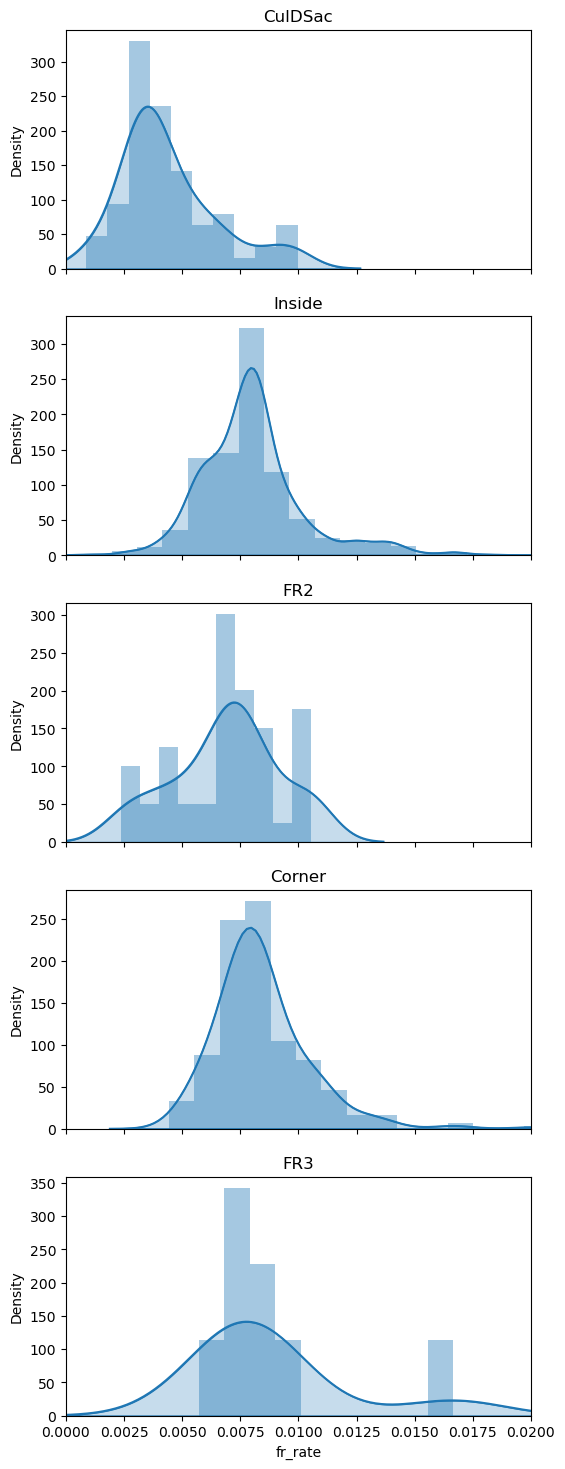

In [23]:
fig, axs = plt.subplots(ncols = 1, nrows = 5,figsize=(6,18),sharex = True)

sns.distplot(df_train[df_train['lot_config'] == 'CulDSac']['fr_rate'],
             ax = axs[0])

sns.kdeplot(df_train[df_train['lot_config'] == 'CulDSac']['fr_rate'],
            fill=True,
             ax = axs[0])


sns.distplot(df_train[df_train['lot_config'] == 'Inside']['fr_rate'],
             bins = 20, 
             ax = axs[1])

sns.kdeplot(df_train[df_train['lot_config'] == 'Inside']['fr_rate'],
            fill=True,
             ax = axs[1])

sns.distplot(df_train[df_train['lot_config'] == 'FR2']['fr_rate'],
             bins = 10, 
             ax = axs[2])

sns.kdeplot(df_train[df_train['lot_config'] == 'FR2']['fr_rate'],
            fill=True,
             ax = axs[2])


sns.distplot(df_train[df_train['lot_config'] == 'Corner']['fr_rate'],
             bins = 30, 
             ax = axs[3])

sns.kdeplot(df_train[df_train['lot_config'] == 'Corner']['fr_rate'],
            fill=True,
             ax = axs[3])


sns.distplot(df_train[df_train['lot_config'] == 'FR3']['fr_rate'],
             bins = 10, 
             ax = axs[4])

sns.kdeplot(df_train[df_train['lot_config'] == 'FR3']['fr_rate'],
            fill=True,
             ax = axs[4])


axs[0].set_title('CulDSac')
axs[1].set_title('Inside')
axs[2].set_title('FR2')
axs[3].set_title('Corner')
axs[4].set_title('FR3')
axs[0].set_xlim(0,0.02);




In [24]:
for idx in range(len(df_train)):
    if df_train.loc[idx,'lot_frontage'] == np.nan:
        config = df_train[idx,'lot_config']
        df_train['lot_frontage'].replace(np.nan,np.random.normal(loc = df_train.loc[df_train['lot_config'] == config,'fr_rate'].median(),
                                                              scale = df_train.loc[df_train['lot_config'] == config,'fr_rate'].std()))

In [25]:
def median(config):
    return df_train.loc[df_train['lot_config'] == config,'fr_rate'].median()
def std(config):
    return df_train.loc[df_train['lot_config'] == config,'fr_rate'].std()
    

In [26]:
for idx in df_train.index:
    if df_train.loc[idx,'lot_frontage'] == np.nan:
        print(f"this is{df_train.loc[idx]}")
        config = df_train.loc[idx,'lot_config']
        df_train.loc[idx,'lot_frontage'] = np.random.normal(loc = median(config), scale = std(config))
        

In [27]:
df_train['lot_frontage'].isnull().sum()

330

In [28]:
df_train['lot_frontage'].fillna(df_train['lot_frontage'].mean())

0       69.0552
1       43.0000
2       68.0000
3       73.0000
4       82.0000
         ...   
2046    79.0000
2047    69.0552
2048    57.0000
2049    80.0000
2050    60.0000
Name: lot_frontage, Length: 2051, dtype: float64

In [29]:
df_train['lot_frontage'].apply(
    lambda row:  df_train[df_train['lot_config'] = row[

SyntaxError: invalid syntax (1524310388.py, line 2)

In [30]:
#for df in [df_train,df_test]:
 #   df['lot_config'] = [0 if val == 'FR3'
  #                     else 1 if val == 'FR2'
   #                    else 2 if val == 'Corner'
    #                    else 3 if val == 'Inside'
     #                   else 4
      #                 for val in df['lot_config']]

In [31]:
#X = df_train.loc[df_train['lot_frontage'] > 0, ['lot_area','lot_config']]
#y = df_train.loc[df_train['lot_frontage'] > 0, 'lot_frontage']
#X_val = df_train.loc[df_train['lot_frontage'] == 0, ['lot_area','lot_config']]
#y_val = df_train.loc[df_train['lot_frontage'] == 0, 'lot_frontage']

#X,y,X_val,y_val = train_test_split(X,y,random_state=42)

In [32]:
#  https://www.storycountyiowa.gov/DocumentCenter/View/6074/A-Guide-to-Geo-Numbering-in-Story-County?bidId=

## Lot Area

In [33]:
df_train['lot_area'].describe()

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: lot_area, dtype: float64

## Street

In [34]:
df_train['street'].value_counts()

Pave    2044
Grvl       7
Name: street, dtype: int64

In [35]:
df_train.groupby(['street'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
street,,,,,,,,
Grvl,7.0,86901.428571,38339.739652,50138.0,56809.0,78000.0,106175.0,154204.0
Pave,2044.0,181793.565558,79173.195670,12789.0,129975.0,163000.0,214000.0,611657.0


In [36]:
for df in [df_train,df_test]:
    df['street'] = [0 if val == 'Grvl' else 1 for val in df['street']]

## Alley

In [37]:
df_train['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [38]:
df_train.groupby(['alley'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
alley,,,,,,,,
Grvl,85.0,120835.635294,35647.047030,35000.0,99900.0,118000.0,142900.0,256000.0
Pave,55.0,174534.709091,46295.412205,40000.0,152000.0,172500.0,193900.0,345000.0


In [39]:
#  drop - already covered in street

In [40]:
df_train.drop(columns = 'alley',axis=1,inplace=True)

## Lot Shape

In [41]:
#  Irregular is better!!

df_train['lot_shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot_shape, dtype: int64

In [42]:
df_train.groupby(['lot_shape'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
lot_shape,,,,,,,,
IR1,692.0,211848.670520,83359.764142,52000.0,157000.0,190000.0,250000.0,611657.0
IR2,55.0,233954.745455,89824.066055,109000.0,174000.0,217500.0,247700.0,538000.0
IR3,9.0,193182.222222,58500.737982,73000.0,163500.0,192140.0,220000.0,267000.0
Reg,1295.0,162925.812355,70198.139114,12789.0,120000.0,145000.0,185492.5,582933.0


In [43]:
for df in [df_train,df_test]:
    df['lot_shape'] = [0 if val == 'Reg' 
                         else 1 if val == 'IR3' 
                         else 2 if val == 'IR2'
                         else 3
                         for val in df['lot_shape']]

## Land Contour

In [44]:
df_train['land_contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64

In [45]:
df_train.groupby(['land_contour'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
land_contour,,,,,,,,
Bnk,80.0,142868.775000,49275.865018,52500.0,109625.0,137250.0,170000.0,315000.0
HLS,85.0,262353.376471,116726.453660,79275.0,173000.0,242000.0,355000.0,552000.0
Low,43.0,199313.116279,82609.276243,13100.0,143500.0,207000.0,270000.0,385000.0
Lvl,1843.0,178998.564840,75697.224509,12789.0,129500.0,161000.0,211000.0,611657.0


In [46]:
for df in [df_train,df_test]:
    df['land_contour'] = [0 if val == 'Bnk' 
                         else 1 if val == 'Lvl' 
                         else 2 if val == 'Low'
                         else 3
                         for val in df['land_contour']]

## Utilities

In [47]:
df_train['utilities'].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [48]:
df_train.groupby(['utilities'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
utilities,,,,,,,,
AllPub,2049.0,181551.602245,79244.116778,12789.0,129850.0,162500.0,214000.0,611657.0
NoSeWa,1.0,137500.000000,NaN,137500.0,137500.0,137500.0,137500.0,137500.0
NoSewr,1.0,57625.000000,NaN,57625.0,57625.0,57625.0,57625.0,57625.0


In [49]:
for df in [df_train,df_test]:
    df['utilities'] = [0 if (val == 'NoSeWa') | (val == 'NoSeWr')
                       else 1
                       for val in df['utilities']]

## Lot Config

In [50]:
df_train['lot_config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

In [51]:
df_train.groupby(['lot_config'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
lot_config,,,,,,,,
Corner,348.0,180629.591954,74223.005036,44000.0,132000.0,161000.0,218209.0,468000.0
CulDSac,131.0,230744.358779,98419.411679,80000.0,158000.0,215000.0,269000.0,591587.0
FR2,60.0,174703.600000,60125.817532,81000.0,132500.0,162250.0,195750.0,394617.0
FR3,9.0,198600.000000,91734.412845,79000.0,119900.0,207000.0,296000.0,315000.0
Inside,1503.0,177537.014637,77749.368500,12789.0,128000.0,159000.0,206740.0,611657.0


In [52]:
# OHE

## Land Slope

In [53]:
df_train['land_slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: land_slope, dtype: int64

In [54]:
df_train.groupby(['land_slope'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
land_slope,,,,,,,,
Gtl,1953.0,180358.476703,77897.279103,12789.0,129500.0,161000.0,212900.0,611657.0
Mod,88.0,204639.465909,102651.673838,13100.0,135125.0,188250.0,257682.0,552000.0
Sev,10.0,194598.000000,85068.824659,61000.0,131250.0,200750.0,270750.0,302000.0


In [55]:
for df in [df_train,df_test]:
    df['land_slope'] = [0 if val == 'Sev'
                       else 1 if val == 'Gtl'
                       else 2
                       for val in df['land_slope']]

## Neighborhood

In [56]:
df['neighborhood'].value_counts()

NAmes      133
CollgCr     87
OldTown     76
Somerst     52
Edwards     50
Gilbert     49
NridgHt     44
NWAmes      44
Sawyer      40
SawyerW     38
Mitchel     32
Crawfor     32
BrkSide     32
Timber      24
IDOTRR      24
NoRidge     23
ClearCr     17
SWISU       16
MeadowV     13
StoneBr     13
BrDale      11
Veenker      7
Blmngtn      6
NPkVill      6
Greens       5
Blueste      4
Name: neighborhood, dtype: int64

## Proximity to "Conditions"

In [57]:
df_train.groupby(['condition_1'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
condition_1,,,,,,,,
Artery,70.0,128765.000000,58285.726961,50000.0,103150.0,118950.0,140750.0,475000.0
Feedr,109.0,143223.605505,45259.511847,35000.0,119600.0,140000.0,160000.0,269500.0
Norm,1767.0,185007.310130,79593.264680,12789.0,131125.0,167000.0,218000.0,611657.0
PosA,12.0,254733.333333,91755.092337,185000.0,188425.0,216000.0,276425.0,455000.0
PosN,27.0,254794.296296,117428.552257,109500.0,172000.0,214500.0,295500.0,591587.0
RRAe,21.0,139685.714286,21115.617105,87000.0,129000.0,142500.0,150000.0,184000.0
RRAn,36.0,172604.777778,55498.209382,79500.0,140150.0,167250.0,187460.0,336820.0
RRNe,3.0,129616.666667,37705.315717,93850.0,109925.0,126000.0,147500.0,169000.0
RRNn,6.0,198208.333333,76223.096347,128000.0,134687.5,184000.0,237250.0,320000.0


In [58]:
df_train.groupby(['condition_2'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
condition_2,,,,,,,,
Artery,5.0,119050.000000,19445.757892,95000.0,108000.0,118000.0,128250.0,146000.0
Feedr,11.0,129181.818182,40785.581231,79500.0,99500.0,128000.0,143250.0,220000.0
Norm,2025.0,181382.075556,78604.763227,12789.0,130000.0,163000.0,214000.0,611657.0
PosA,3.0,390666.666667,65010.255601,325000.0,358500.0,392000.0,423500.0,455000.0
PosN,3.0,395666.666667,67633.817971,334000.0,359500.0,385000.0,426500.0,468000.0
RRAe,1.0,190000.000000,NaN,190000.0,190000.0,190000.0,190000.0,190000.0
RRAn,1.0,136905.000000,NaN,136905.0,136905.0,136905.0,136905.0,136905.0
RRNn,2.0,96750.000000,39951.533137,68500.0,82625.0,96750.0,110875.0,125000.0


In [59]:
df_train['condition_1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [60]:
#  Apparently E-W is worse
#  Keep it as ordinal

for df in [df_train,df_test]:
    for cond in ['condition_1','condition_2']:
        df[cond] = [0 if (val == 'RRAe') | (val == 'RRNe')
                    else 1 if (val == 'RRAn') | (val == 'RRNn')
                    else 2 if val == 'Artery'
                    else 3 if val == 'Feedr'
                    else 4 if val == 'Normal'
                    else 5 if val == 'PosN'
                    else 6 
                    for val in df[cond]]

## Building Type

In [61]:
df_train.groupby(['bldg_type'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
bldg_type,,,,,,,,
1Fam,1700.0,185275.685882,81912.397035,12789.0,130500.0,165200.0,219282.5,611657.0
2fmCon,46.0,123179.891304,30304.813341,55000.0,101187.5,121200.0,139875.0,200000.0
Duplex,75.0,139296.333333,40824.044796,62500.0,118250.0,136000.0,148991.5,269500.0
Twnhs,69.0,133100.000000,37977.260030,73000.0,100000.0,134000.0,160000.0,230000.0
TwnhsE,161.0,198312.372671,65866.184832,79400.0,147000.0,184000.0,234250.0,392500.0


In [62]:
for df in [df_train,df_test]:
    df['bldg_type'] = [0 if val == '2fmCon'
                       else 1 if val == 'Twnhs'
                       else 2 if val == 'Duplex'
                       else 3 
                       for val in df['bldg_type']]

## House Style (floors)

In [63]:
df_train['house_style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

In [64]:
df_train.groupby(['house_style'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
house_style,,,,,,,,
1.5Fin,218.0,136480.091743,44910.975892,37900.0,113250.00,128700.0,149375.0,410000.0
1.5Unf,12.0,112466.666667,21111.364166,64500.0,107925.00,113000.0,122250.0,139400.0
1Story,1059.0,179809.194523,81725.146760,12789.0,128000.00,156000.0,214000.0,611657.0
2.5Fin,6.0,243666.666667,128464.262216,104000.0,192500.00,198500.0,271250.0,475000.0
2.5Unf,14.0,191785.714286,87041.483100,101000.0,133125.00,165500.0,212125.0,415000.0
2Story,598.0,206408.963211,82240.431218,40000.0,152768.75,189000.0,243875.0,584500.0
SFoyer,50.0,149343.920000,31859.449693,73000.0,130475.00,147500.0,169625.0,224500.0
SLvl,94.0,166248.989362,37262.422556,91000.0,145000.00,164750.0,177875.0,345000.0


In [65]:
#  OHE

## Quality/Condition Columns - Numeric

In [66]:
df_train['overall_qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: overall_qual, dtype: int64

In [67]:
df_train['overall_cond'].value_counts()

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: overall_cond, dtype: int64

## Year Built/Remod

In [68]:
df_train['year_built'].describe()

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: year_built, dtype: float64

In [69]:
df_train['year_remod/add'].describe()

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: year_remod/add, dtype: float64

##  Roof

In [70]:
df_train['roof_style'].value_counts()

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: roof_style, dtype: int64

In [71]:
df_train.groupby(['roof_style'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
roof_style,,,,,,,,
Flat,13.0,191613.076923,61659.734752,113500.0,129000.0,167000.0,242000.0,274970.0
Gable,1619.0,171264.253243,64948.908434,12789.0,128000.0,159000.0,203000.0,475000.0
Gambrel,12.0,138208.333333,66068.524459,40000.0,93725.0,125250.0,172500.0,259500.0
Hip,397.0,224366.654912,112153.404004,50138.0,140000.0,180500.0,290000.0,611657.0
Mansard,7.0,152642.857143,80646.716344,44000.0,108500.0,150000.0,182500.0,292500.0
Shed,3.0,208666.666667,63105.731383,157000.0,173500.0,190000.0,234500.0,279000.0


In [72]:
df_train.groupby(['roof_matl'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
roof_matl,,,,,,,,
ClyTile,1.0,160000.000000,NaN,160000.0,160000.0,160000.0,160000.0,160000.0
CompShg,2025.0,180849.197037,79013.718606,12789.0,129500.0,161500.0,213000.0,611657.0
Membran,1.0,241500.000000,NaN,241500.0,241500.0,241500.0,241500.0,241500.0
Tar&Grv,15.0,187948.933333,56957.886372,113500.0,137000.0,167000.0,246382.0,274970.0
WdShake,4.0,264250.000000,49562.250420,190000.0,262750.0,287250.0,288750.0,292500.0
WdShngl,5.0,339400.000000,88618.846754,278000.0,279000.0,280000.0,385000.0,475000.0


##  Quality/Condition Columns - Categorical 

In [73]:
for col in ['exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc','kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc']:
    print(df[col].value_counts())

TA    552
Gd    292
Ex     25
Fa      9
Name: exter_qual, dtype: int64
TA    770
Gd     84
Fa     18
Ex      5
Po      1
Name: exter_cond, dtype: int64
TA    396
Gd    355
Ex     73
Fa     28
Po      1
Name: bsmt_qual, dtype: int64
TA    781
Fa     39
Gd     33
Name: bsmt_cond, dtype: int64
Ex    429
TA    267
Gd    157
Fa     25
Name: heating_qc, dtype: int64
TA    447
Gd    354
Ex     53
Fa     23
Po      1
Name: kitchen_qual, dtype: int64
Gd    220
TA    193
Fa     16
Po     15
Ex     12
Name: fireplace_qu, dtype: int64
TA    782
Fa     42
Gd      6
Po      3
Name: garage_qual, dtype: int64
TA    796
Fa     27
Po      6
Gd      3
Ex      1
Name: garage_cond, dtype: int64
Ex    3
TA    1
Name: pool_qc, dtype: int64


In [74]:
df_train['year_built'].corrwith(df_train['exter_qual'])

AttributeError: 'Series' object has no attribute 'corrwith'

In [ ]:
df_train['bsmt_qual'].isnull().sum()

In [ ]:
sns.histplot(data = df_train, x = 'bsmt_cond', hue = 'year_built')

In [75]:
df_train.loc[df_train['bsmt_qual'].isnull() == False,'year_built'].corr(df_train.loc[df_train['bsmt_qual'].isnull() == False,'bsmt_qual'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [76]:
for df in [df_train,df_test]:
    for col in ['exter_qual','exter_cond','bsmt_qual','bsmt_cond',
                'heating_qc','kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc']:
        df[col] = [0 if val == 'NA'
                   else 1 if val == 'Po'
                   else 2 if val == 'Fa'
                   else 3 if val == 'TA'
                   else 4 if val == 'Gd'
                   else 5
                   for val in df[col]]
                

In [77]:
df_train['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [78]:
for df in [df_train,df_test]:
    df['bsmt_exposure'] = [0 if val == 'NA'
                           else 1 if val == 'No'
                           else 2 if val == 'Mn'
                           else 3 if val == 'Av'
                           else 4 
                           for val in df['bsmt_exposure']]

In [79]:
print(df_train['bsmtfin_type_1'].value_counts())
print(df_train['bsmtfin_type_2'].value_counts())

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64
Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64


In [80]:
for df in [df_train,df_test]:
    for col in ['bsmtfin_type_1','bsmtfin_type_2']:
        df[col] = [0 if val == 'NA'
                   else 1 if val == 'Unf'
                   else 2 if val == 'LwQ'
                   else 3 if val == 'Rec'
                   else 4 if val == 'BLQ'
                   else 5 if val == 'ALQ'
                   else 6
                   for val in df[col]]

In [81]:
df_train['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [82]:
for df in [df_train,df_test]:
    df['garage_type'] = [0 if val == 'NA'
                         else 1 if val == 'CarPort'
                         else 2 if val == 'Detchd'
                         else 3 if val == 'Basment'
                         else 4 if val == 'Attchd'
                         else 5 if val == 'BuiltIn'
                         else 6
                         for val in df['garage_type']]

In [83]:
df_train['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64

In [84]:
for df in [df_train,df_test]:
    df['garage_finish'] = [0 if val == 'NA'
                           else 1 if val == 'Unf'
                           else 2 if val == 'RFn'
                           else 3
                           for val in df['garage_finish']]

In [85]:
df_train['electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [86]:
for df in [df_train,df_test]:
    df['electrical'] = [0 if val == 'FuseP'
                        else 1 if val == 'FuseF'
                        else 2 if val == 'FuseA'
                        else 3 if val == 'Mix'
                        else 4
                        for val in df['electrical']]

In [87]:
df_train['central_air'].value_counts()

Y    1910
N     141
Name: central_air, dtype: int64

In [88]:
for df in [df_train,df_test]:
    df['central_air'] = [1 if val == 'Y' else 0 for val in df['central_air']]

In [89]:
df_train['functional'].value_counts()

Typ     1915
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: functional, dtype: int64

In [90]:
for df in [df_train,df_test]:
    df['functional'] = [0 if val == 'Sal'
                        else 1 if val == 'Sev'
                        else 2 if val == 'Maj2'
                        else 3 if val == 'Maj1'
                        else 4 if val == 'Mod'
                        else 5 if val == 'Min2'
                        else 6 if val == 'Min1'
                        else 7
                        for val in df['functional']]

In [91]:
df_train['paved_drive'].value_counts()

Y    1861
N     151
P      39
Name: paved_drive, dtype: int64

In [92]:
for df in [df_train,df_test]:
    df['paved_drive'] = [0 if val == 'N'
                         else 1 if val == 'P'
                         else 2
                         for val in df['paved_drive']]

In [93]:
df_train['fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [94]:
df_train['land_contour'].value_counts()

1    1843
3      85
0      80
2      43
Name: land_contour, dtype: int64

In [95]:
for df in [df_train,df_test]:
    df['land_contour'] = [0 if val == 'IR3' 
                         else 1 if val == 'IR2' 
                         else 2 if val == 'IR1'
                         else 3
                         for val in df['land_contour']]

In [96]:
df_train['utilities'].value_counts()

1    2050
0       1
Name: utilities, dtype: int64

In [97]:
for df in [df_train,df_test]:
    df['utilities'] = [0 if val == 'NoSeWa'
                       else 1 if val == 'NoSeWr'
                       else 2 
                       for val in df['utilities']]

In [98]:
df_train['condition_1'].value_counts()

6    1779
3     109
2      70
1      42
5      27
0      24
Name: condition_1, dtype: int64

In [99]:
for df in [df_train,df_test]:
    for cond in ['condition_1','condition_2']:
        df[cond] = [0 if (val == 'RRAe') | (val == 'RRAn')
                    else 1 if (val == 'RRNe') | (val == 'RRNn')
                    else 2 if val == 'Artery'
                    else 3 if val == 'Feedr'
                    else 4 if val == 'Normal'
                    else 5 if val == 'PosN'
                    else 6 
                    for val in df[cond]]

In [100]:
df_train['bldg_type'].value_counts()

3    1861
2      75
1      69
0      46
Name: bldg_type, dtype: int64

In [101]:
for df in [df_train,df_test]:
    df['bldg_type'] = [0 if val == 'Twnhs'
                       else 1 if val == 'TwnhsE'
                       else 2 if val == 'Duplex'
                       else 3 if val == '2fmCon'
                       else 4
                       for val in df['bldg_type']]

In [102]:
df_train['house_style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

In [103]:
for df in [df_train,df_test]:
    df['house_style'] = [0 if val == '1Story'
                         else 1 if val == '1.5Unf'
                         else 2 if val == '1.5Fin'
                         else 3 if val == 'SLvl'
                         else 4 if val == 'SFoyer'
                         else 5 if val == '2Story'
                         else 6 if val == '2.5Unf'
                         else 7
                       for val in df['house_style']]

In [104]:
for col in ['exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc','kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc']:
    print(df[col].value_counts())

3    552
4    292
5     25
2      9
Name: exter_qual, dtype: int64
3    770
4     84
2     18
5      5
1      1
Name: exter_cond, dtype: int64
3    396
4    355
5     98
2     28
1      1
Name: bsmt_qual, dtype: int64
3    781
2     39
4     33
5     25
Name: bsmt_cond, dtype: int64
5    429
3    267
4    157
2     25
Name: heating_qc, dtype: int64
3    447
4    354
5     53
2     23
1      1
Name: kitchen_qual, dtype: int64
5    434
4    220
3    193
2     16
1     15
Name: fireplace_qu, dtype: int64
3    782
5     45
2     42
4      6
1      3
Name: garage_qual, dtype: int64
3    796
5     46
2     27
1      6
4      3
Name: garage_cond, dtype: int64
5    877
3      1
Name: pool_qc, dtype: int64


In [105]:
for df in [df_train,df_test]:
    for col in ['exter_qual','exter_cond','bsmt_qual','bsmt_cond',
                'heating_qc','kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc']:
        df[col] = [0 if val == 'NA'
                   else 1 if val == 'Po'
                   else 2 if val == 'Fa'
                   else 3 if val == 'TA'
                   else 4 if val == 'Gd'
                   else 5
                   for val in df[col]]
                

In [106]:
df_train['bsmt_exposure'].value_counts()

1    1339
3     288
4     261
2     163
Name: bsmt_exposure, dtype: int64

In [107]:
for df in [df_train,df_test]:
    df['bsmt_exposure'] = [0 if val == 'NA'
                           else 1 if val == 'No'
                           else 2 if val == 'Mn'
                           else 3 if val == 'Av'
                           else 4 
                           for val in df['bsmt_exposure']]

In [108]:
print(df_train['bsmtfin_type_1'].value_counts())
print(df_train['bsmtfin_type_2'].value_counts())

6    670
1    603
5    293
4    200
3    183
2    102
Name: bsmtfin_type_1, dtype: int64
1    1749
3      80
6      79
2      60
4      48
5      35
Name: bsmtfin_type_2, dtype: int64


In [109]:
for df in [df_train,df_test]:
    for col in ['bsmtfin_type_1','bsmtfin_type_2']:
        df[col] = [0 if val == 'NA'
                   else 1 if val == 'Unf'
                   else 2 if val == 'LwQ'
                   else 3 if val == 'Rec'
                   else 4 if val == 'BLQ'
                   else 5 if val == 'ALQ'
                   else 6
                   for val in df[col]]

In [110]:
df_train['garage_type'].value_counts()

4    1213
2     536
5     132
6     132
3      27
1      11
Name: garage_type, dtype: int64

In [111]:
for df in [df_train,df_test]:
    df['garage_type'] = [0 if val == 'NA'
                         else 1 if val == 'CarPort'
                         else 2 if val == 'Detchd'
                         else 3 if val == 'Basment'
                         else 4 if val == 'Attchd'
                         else 5 if val == 'BuiltIn'
                         else 6
                         for val in df['garage_type']]

In [112]:
df_train['garage_finish'].value_counts()

1    849
3    623
2    579
Name: garage_finish, dtype: int64

In [113]:
for df in [df_train,df_test]:
    df['garage_finish'] = [0 if val == 'NA'
                           else 1 if val == 'Unf'
                           else 2 if val == 'RFn'
                           else 3
                           for val in df['garage_finish']]

In [114]:
df_train['electrical'].value_counts()

4    1868
2     140
1      35
0       7
3       1
Name: electrical, dtype: int64

In [115]:
for df in [df_train,df_test]:
    df['electrical'] = [0 if val == 'FuseP'
                        else 1 if val == 'FuseF'
                        else 2 if val == 'FuseA'
                        else 3 if val == 'Mix'
                        else 4
                        for val in df['electrical']]

In [116]:
df_train['central_air'].value_counts()

1    1910
0     141
Name: central_air, dtype: int64

In [117]:
for df in [df_train,df_test]:
    df['central_air'] = [1 if val == 'Y' else 0 for val in df['central_air']]

In [118]:
df_train['functional'].value_counts()

7    1915
5      42
6      42
4      29
3      12
2       7
1       2
0       2
Name: functional, dtype: int64

In [119]:
for df in [df_train,df_test]:
    df['functional'] = [0 if val == 'Sal'
                        else 1 if val == 'Sev'
                        else 2 if val == 'Maj2'
                        else 3 if val == 'Maj1'
                        else 4 if val == 'Mod'
                        else 5 if val == 'Min2'
                        else 6 if val == 'Min1'
                        else 7
                        for val in df['functional']]

In [120]:
df_train['paved_drive'].value_counts()

2    1861
0     151
1      39
Name: paved_drive, dtype: int64

In [121]:
for df in [df_train,df_test]:
    df['paved_drive'] = [0 if val == 'N'
                         else 1 if val == 'P'
                         else 2
                         for val in df['paved_drive']]

In [122]:
df_train['fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [123]:
for df in [df_train,df_test]:
    df['fence_mat'] = [0 if val == 'NA'
                       else 1 if val == 'MnWw'
                       else 2 if val == 'GdWo'
                       else 0
                       for val in df['fence']]

In [124]:
for df in [df_train,df_test]:
    df['fence_priv'] = [0 if val == 'NA'
                       else 1 if val == 'MnPrv'
                       else 2 if val == 'GdPrv'
                       else 0
                       for val in df['fence']]

In [125]:
df_train.to_csv('./datasets/df_train.csv',index=False)
df_test.to_csv('./datasets/df_test.csv',index=False)